In [2]:
# Bk4_Ch10_01.py

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.datasets import load_iris

# A copy from Seaborn
iris = load_iris()

X = iris.data
y = iris.target

feature_names = ['Sepal length, x1','Sepal width, x2',
                 'Petal length, x3','Petal width, x4']

# Convert X array to dataframe
X_df = pd.DataFrame(X, columns=feature_names)


In [3]:
X = X_df.to_numpy();

# Gram matrix, G and orthogonal basis V

G = X.T@X
# 计算特征值和特征向量
D, V = np.linalg.eig(G)
# numpy.linalg.eig() 函数用于计算方阵的特征值和特征向量

In [4]:
def heatmap(Matrices,Titles,Ranges,Equal_tags):
    
    M1 = Matrices[0]
    M2 = Matrices[1]
    M3 = Matrices[2]
    
    Title_1 = Titles[0]
    Title_2 = Titles[1]
    Title_3 = Titles[2]
    
    fig, axs = plt.subplots(1, 5, figsize=(12, 3))
    
    plt.sca(axs[0])
    ax = sns.heatmap(M1,cmap='RdYlBu_r',
                     vmin = Ranges[0][0], 
                     vmax = Ranges[0][1],
                     cbar=False,
                     xticklabels=False,
                     yticklabels=False)
    
    if Equal_tags[0] == True:
        ax.set_aspect("equal")
        
    plt.title(Title_1)
    
    plt.sca(axs[1])
    plt.title('=')
    plt.axis('off')
    
    plt.sca(axs[2])
    ax = sns.heatmap(M2,cmap='RdYlBu_r',
                     vmin = Ranges[1][0], 
                     vmax = Ranges[1][1],
                     cbar=False,
                     xticklabels=False,
                     yticklabels=False)
    if Equal_tags[1] == True:
        ax.set_aspect("equal")
    plt.title(Title_2)
    
    plt.sca(axs[3])
    plt.title('@')
    plt.axis('off')
    
    plt.sca(axs[4])
    ax = sns.heatmap(M3,cmap='RdYlBu_r',
                     vmin = Ranges[2][0], 
                     vmax = Ranges[2][1],
                     cbar=False,
                     xticklabels=False,
                     yticklabels=False)
    
    if Equal_tags[2] == True:
        ax.set_aspect("equal")
    plt.title(Title_3)


In [5]:
def plot_four_figs(X,v_j,idx):

    # Fig 1: X@v_j = z_j
    
    z_j = X@v_j
    Titles = ['$X$',
              '$v_' + str(idx) + '$',
              '$z_' + str(idx) + '$']
    
    Ranges = [[-2,11],
              [-1,1],
              [-2,11]]
    
    Equal_tags = [False,True,False]
    heatmap([X,v_j,z_j],Titles,Ranges,Equal_tags)

    # Fig 2: z@v_j.T = X_j
    X_j = z_j@v_j.T
    Titles = ['$z_' + str(idx) + '$',
              '$v_' + str(idx) + '^T$',
              '$X_' + str(idx) + '$']
    
    Ranges = [[-2,11],
              [-1,1],
              [-2,11]]
    
    Equal_tags = [False,True,False]
    
    heatmap([z_j,v_j.T,X_j],Titles,Ranges,Equal_tags)

    # Fig 3: T_j = v_j@v_j.T
    T_j = v_j@v_j.T
    
    Titles = ['$v_' + str(idx) + '$',
              '$v_' + str(idx) + '^T$',
              '$T_' + str(idx) + '$']
    
    Ranges = [[-1,1],
              [-1,1],
              [-1,1]]
    
    Equal_tags = [True,True,True]
    
    heatmap([v_j,v_j.T,T_j],Titles,Ranges,Equal_tags)

    
    # Fig 4: X@T_j = X_j
    
    T_j = X@T_j
    
    Titles = ['$X$',
              '$T_' + str(idx) + '$',
              '$X_' + str(idx) + '$']
    
    Ranges = [[-2,11],
              [-1,1],
              [-2,11]]
    
    Equal_tags = [False,True,False]
    
    heatmap([X,T_j,X_j],Titles,Ranges,Equal_tags)



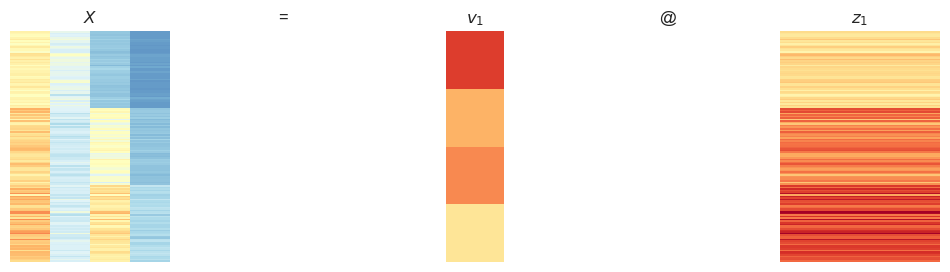

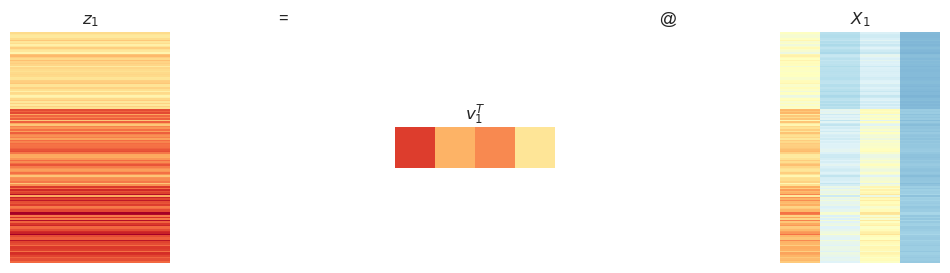

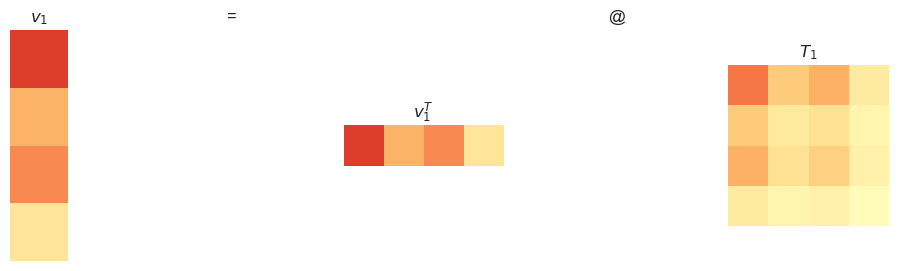

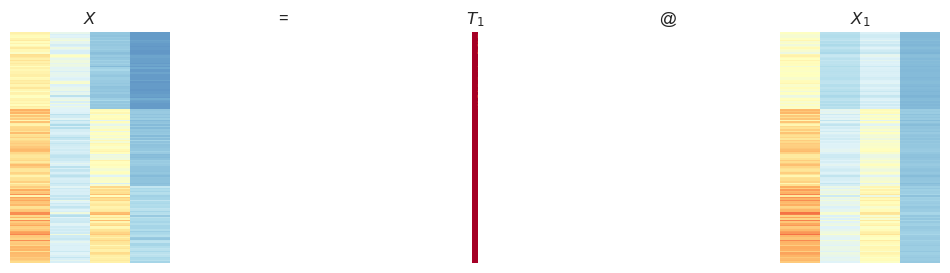

In [6]:
v1 = V[:, 0].reshape((-1, 1))

plot_four_figs(X,v1,1)


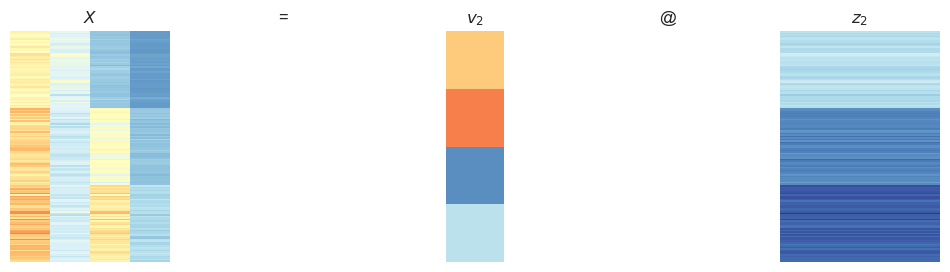

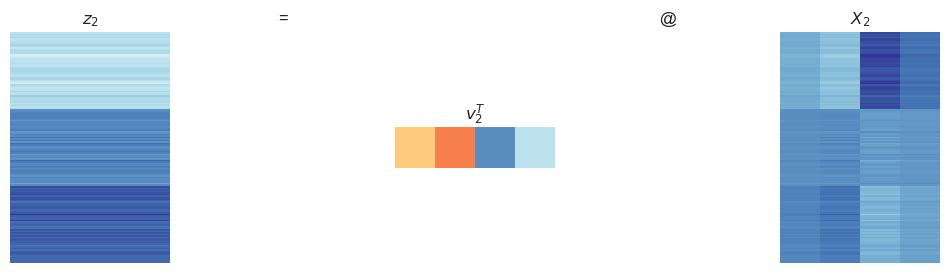

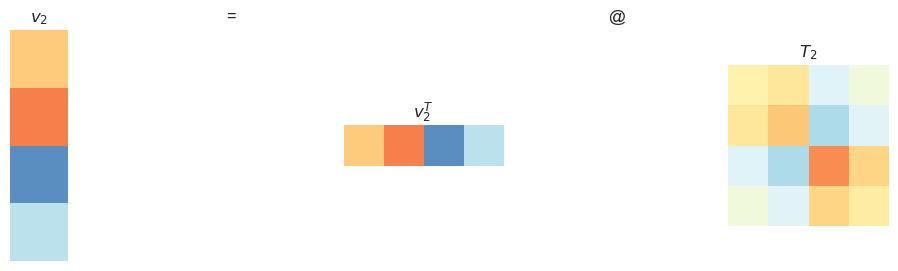

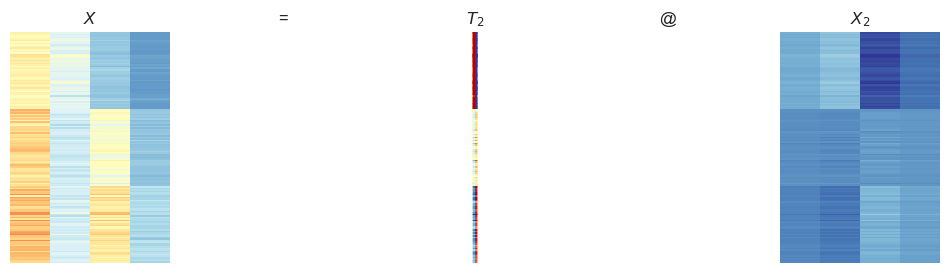

In [7]:
v2 = V[:, 1].reshape((-1, 1))

plot_four_figs(X,v2,2)


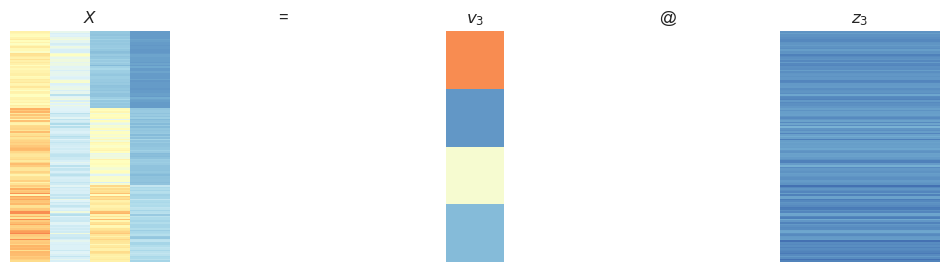

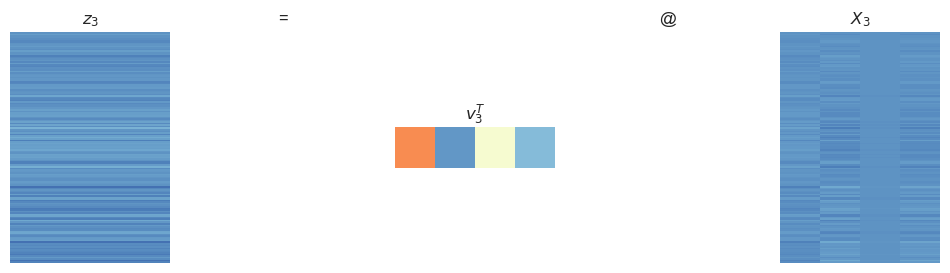

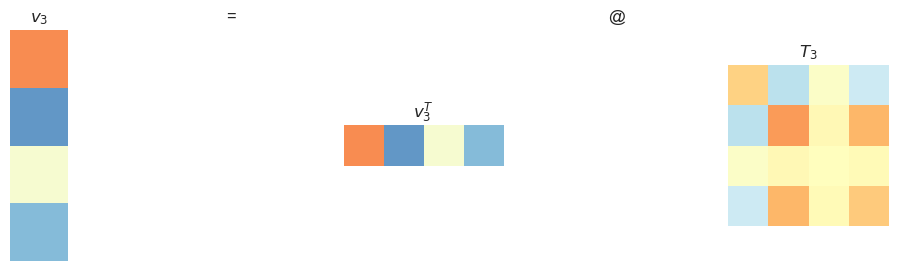

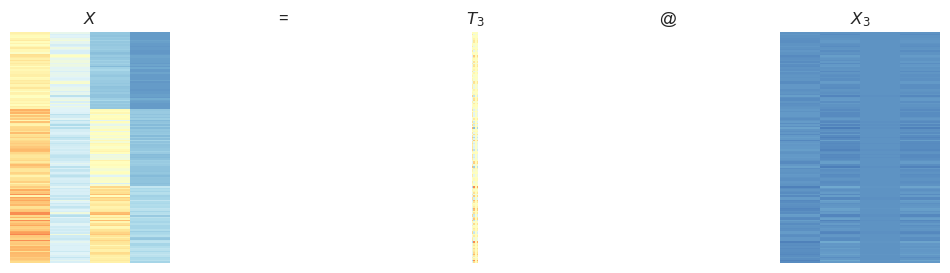

In [8]:
v3 = V[:, 2].reshape((-1, 1))

plot_four_figs(X,v3,3)


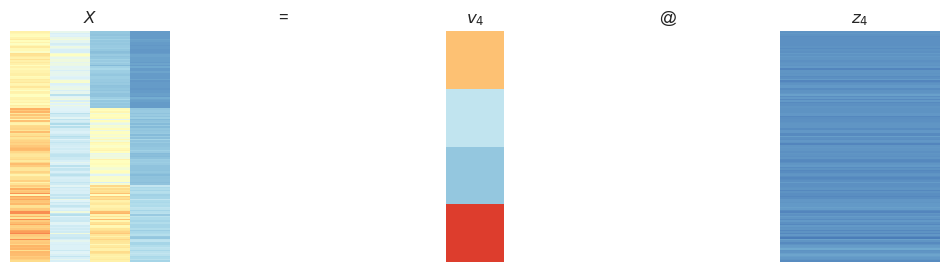

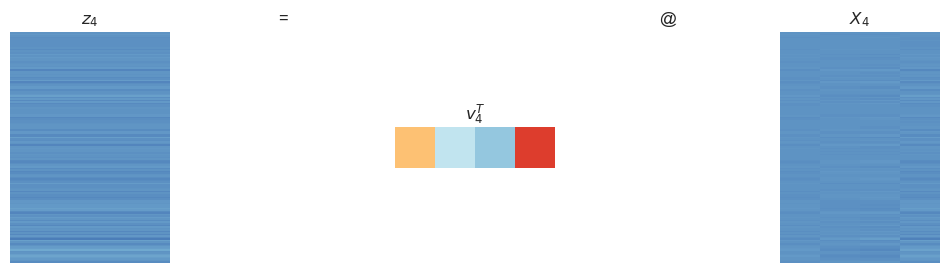

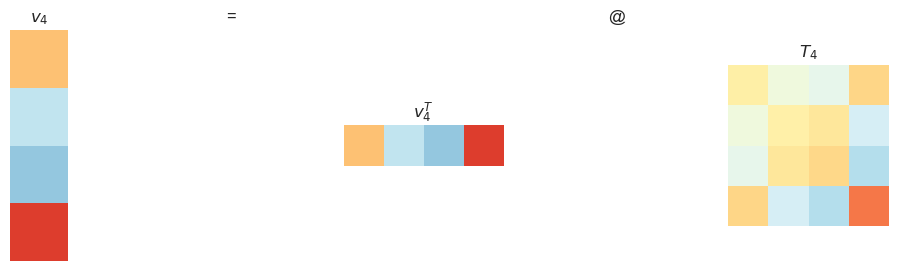

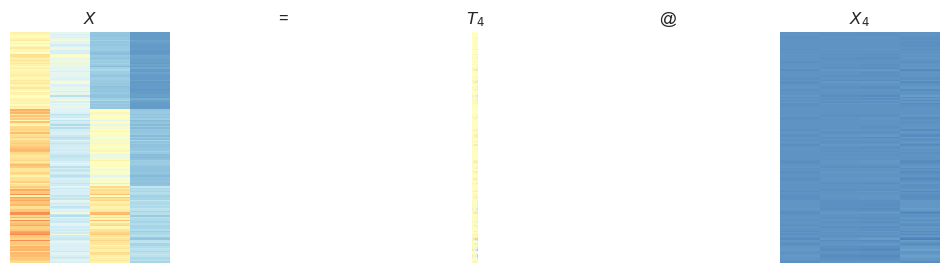

In [9]:
v4 = V[:, 3].reshape((-1, 1))

plot_four_figs(X,v4,4)
